In [13]:
import os
from datetime import datetime, time, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Candle Size Per Time Bucket

Dataset: spy-1m.csv Size: 10327



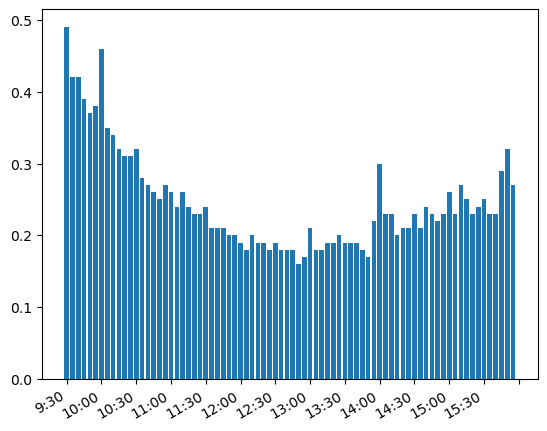

Dataset: spy-5m.csv Size: 9837



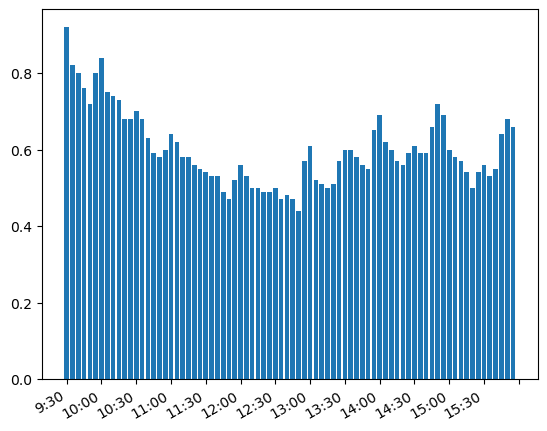

Dataset: spy-1h.csv Size: 10439



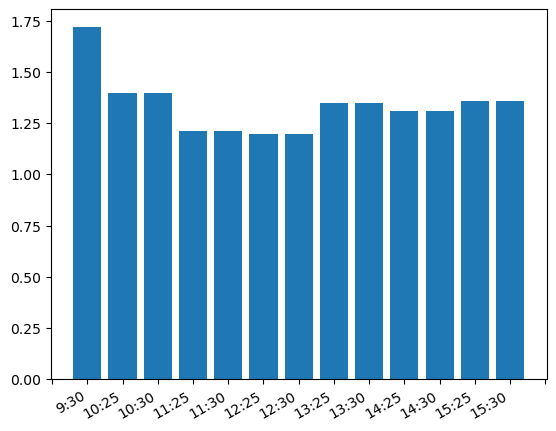

In [14]:
def calculate_distribution(df):

    # Convert time to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    if dataset == "spy-1d.csv":
        df = df.iloc[-1000:]
    
    # Bucket size
    bucket_size = 5
    
    # Create list of time intervals
    time_list = []
    for hour in range(14, 21):
    # Iterate over minutes at intervals
        for minute in range(0, 60, bucket_size):
            # Check if the time is within the desired range
            if hour == 14 and minute < 30:
                continue
            if hour == 21 and minute > 0:
                continue
            # Create the time string and add it to the list
            time_list.append(f"{hour:02d}:{minute:02d}")
    

    # Bucket candle lengths per time period
    results = {}
    for index, row in df.iterrows():
        for time_str in time_list:
            if time_str not in results:
                results[time_str] = {"values":[]}
            time = datetime.strptime(time_str, '%H:%M')

            if time.time() <= row['time'].time() <= (time + timedelta(minutes=bucket_size)).time():
                results[time_str]["values"].append(round(row['high'] - row['low'],2))

                
    # Build graph values
    graph_result = {}
    for index, row in results.items():
        if len(row["values"]) > 0:
            avg = round(sum(row["values"])/len(row["values"]),2)
            graph_result[index] = avg

    
    names = list(graph_result.keys())
    values = list(graph_result.values())
    
    #Switch from UK to US hours
    for i,n in enumerate(names):
        names[i] = str(int(n.split(":")[0]) - 5) + ":" + n.split(":")[1]

    fig, ax = plt.subplots()
    plt.bar(range(len(graph_result)), values, tick_label=names)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.show()
    
    
# Files with different data from Tradingviiew
datasets = ["spy-1m.csv","spy-5m.csv","spy-1h.csv"]
#datasets = ["aapl-1m.csv","aapl-5m.csv","aapl-1h.csv"]

# Calculate colour stats for each file
for dataset in datasets:
    print("=======================================")
    df = pd.read_csv(dataset).dropna()
    print("Dataset: " + dataset + " Size: " + str(len(df.index)))
    print("")
    calculate_distribution(df)